In [1]:
import spacy
nlp=spacy.load('en_core_web_sm')

# 1. Parts Of Speech Tagging

## 1.1 Splitting the Tokens

In [2]:
s='GPT is an Indian company which provides one of the finest education. '
d=nlp(s)
print(d)

GPT is an Indian company which provides one of the finest education. 


In [3]:
d[0]  #access particular token at the index
# d[2]
# d[0].text #converts the token into a string

GPT

## 1.2 Finding the part of Speech

In [4]:
# for i in d:
#     print(i,'-->',i.pos_)
for i in range(len(d)):
    print(d[i],'-->',d[i].pos_)

GPT --> PROPN
is --> AUX
an --> DET
Indian --> ADJ
company --> NOUN
which --> PRON
provides --> VERB
one --> NUM
of --> ADP
the --> DET
finest --> ADJ
education --> NOUN
. --> PUNCT


## 1.3 Finding the Grained Part of Speech

In [5]:
for i in d:
    print(i,'-->',i.tag_)
# for i in range(len(d)):
#     print(d[i],'-->',d[i].tag_)

GPT --> NNP
is --> VBZ
an --> DT
Indian --> JJ
company --> NN
which --> WDT
provides --> VBZ
one --> CD
of --> IN
the --> DT
finest --> JJS
education --> NN
. --> .


## 1.4 spacy.explain()

In [6]:
for token in d:
    print(f'{token.text:{10}}{token.pos_:{10}}{token.tag_:{10}}{spacy.explain(token.tag_)}')

GPT       PROPN     NNP       noun, proper singular
is        AUX       VBZ       verb, 3rd person singular present
an        DET       DT        determiner
Indian    ADJ       JJ        adjective (English), other noun-modifier (Chinese)
company   NOUN      NN        noun, singular or mass
which     PRON      WDT       wh-determiner
provides  VERB      VBZ       verb, 3rd person singular present
one       NUM       CD        cardinal number
of        ADP       IN        conjunction, subordinating or preposition
the       DET       DT        determiner
finest    ADJ       JJS       adjective, superlative
education NOUN      NN        noun, singular or mass
.         PUNCT     .         punctuation mark, sentence closer


In [7]:
spacy.explain(d[0].tag_)

'noun, proper singular'

## 2.1 Visualization of POS

In [8]:
from spacy import displacy

In [9]:
displacy.render(d)

## 2.2 Visualization od Part  of Speech | Adding Functionalities

In [10]:
displacy.render(d,options={'distance':100,'color':'blue','bg':'pink','font':'times'})

In [11]:
displacy.render(d,options={'distance':100,'color':'RGB(40,200,0)','bg':'RGB(160,20,0)','font':'times'})

# 2. Names Entity Ecognition

## 2.1 Defining Entity Function

In [12]:
doc=nlp(s)

In [13]:
doc.ents

(GPT, Indian)

In [14]:
def show_entities(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent," | ",ent.label_," | ",spacy.explain(ent.label_))
    else:
        print('no entities found')
    

In [15]:
show_entities(doc)

GPT  |  ORG  |  Companies, agencies, institutions, etc.
Indian  |  NORP  |  Nationalities or religious or political groups


In [16]:
show_entities(nlp("I am not feeling well today"))

today  |  DATE  |  Absolute or relative dates or periods


## 2.2 Adding new Entitites

In [17]:
show_entities(nlp("teslie is one of the biggest tech gaint in the feild of electric vehicles"))

no entities found


In [18]:
from spacy.tokens import Span as sp

doc=nlp("teslie is one of the biggest tech gaint in the feild of electric vehicles")

# ORG=d.vocab.strings['ORG']
new_entity=sp(d, 0,1, label = d.vocab.strings['ORG'])

doc.ents=list(doc.ents)+[new_entity]

show_entities(doc)

teslie  |  ORG  |  Companies, agencies, institutions, etc.


## 2.3 Adding new entities - Multiple at a time

In [19]:
from spacy.matcher import PhraseMatcher
doc=nlp('Playing Cricket and Football are both good for health')

m=PhraseMatcher(nlp.vocab)
phrase=['Cricket','Football']

pattern=[(nlp(text)) for text in phrase]

m.add('Sports',None,*pattern)
show_entities(doc)


no entities found


In [20]:
sport=doc.vocab.strings['Sports']

found=m(doc)

new_ents=[sp(doc,mtch[1],mtch[2],label=sport) for mtch in found]

doc.ents=list(doc.ents)+new_ents

show_entities(doc)

Cricket  |  Sports  |  None
Football  |  Sports  |  None


C:\Users\91991\anaconda3\Lib\site-packages\spacy\glossary.py:20: UserWarning: [W118] Term 'Sports' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


## 2.4 Finding the Specific Tag Words

In [50]:
doc=nlp('GFG and Google and Apple, 1 Million Dollars, 2 Billion')
show_entities(doc)

GFG  |  ORG  |  Companies, agencies, institutions, etc.
Google  |  ORG  |  Companies, agencies, institutions, etc.
Apple  |  ORG  |  Companies, agencies, institutions, etc.
1 Million Dollars  |  MONEY  |  Monetary values, including unit
2 Billion  |  CARDINAL  |  Numerals that do not fall under another type


In [51]:
doc.ents

(GFG, Google, Apple, 1 Million Dollars, 2 Billion)

In [52]:
[ent for ent in doc.ents if ent.label_=='ORG']

[GFG, Google, Apple]

In [53]:
[ent for ent in doc.ents if ent.label_=='MONEY']

[1 Million Dollars]

# 3 Word Cloud from Scratch

In [60]:
# !pip install wordcloud

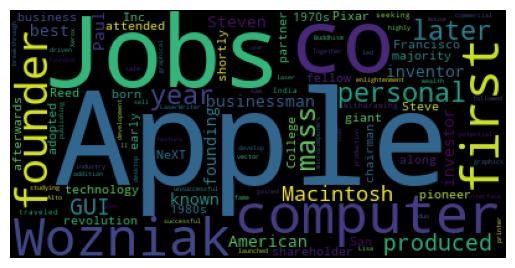

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text='''Steven Paul Jobs was an American businessman, inventor, and investor best known for co-founding the technology giant Apple Inc. Jobs was also the founder of NeXT and chairman and majority shareholder of Pixar. He was a pioneer of the personal computer revolution of the 1970s and 1980s, along with his early business partner and fellow Apple co-founder Steve Wozniak. 
Jobs was born in San Francisco in 1955 and adopted shortly afterwards. He attended Reed College in 1972 before withdrawing that same year. In 1974, he traveled through India, seeking enlightenment before later studying Zen Buddhism. He and Wozniak co-founded Apple in 1976 to further develop and sell Wozniak's Apple I personal computer. Together, the duo gained fame and wealth a year later with production and sale of the Apple II, one of the first highly successful mass-produced microcomputers. Jobs saw the commercial potential of the Xerox Alto in 1979, which was mouse-driven and had a graphical user interface (GUI). This led to the development of the unsuccessful Apple Lisa in 1983, followed by the breakthrough Macintosh in 1984, the first mass-produced computer with a GUI. The Macintosh launched the desktop publishing industry in 1985 with the addition of the Apple LaserWriter, the first laser printer to feature vector graphics '''

wc=WordCloud().generate(text)

plt.imshow(wc)
plt.axis('off')
plt.show()

"Steven Paul Jobs (February 24, 1955 – October 5, 2011) was an American businessman, inventor, and investor best known for co-founding the technology giant Apple Inc. Jobs was also the founder of NeXT and chairman and majority shareholder of Pixar. He was a pioneer of the personal computer revolution of the 1970s and 1980s, along with his early business partner and fellow Apple co-founder Steve Wozniak. Jobs was born in San Francisco in 1955 and adopted shortly afterwards. He attended Reed College in 1972 before withdrawing that same year. In 1974, he traveled through India, seeking enlightenment before later studying Zen Buddhism. He and Wozniak co-founded Apple in 1976 to further develop and sell Wozniak's Apple I personal computer. Together, the duo gained fame and wealth a year later with production and sale of the Apple II, one of the first highly successful mass-produced microcomputers. Jobs saw the commercial potential of the Xerox Alto in 1979, which was mouse-driven and had a 

## 3.1 word cloud in detail

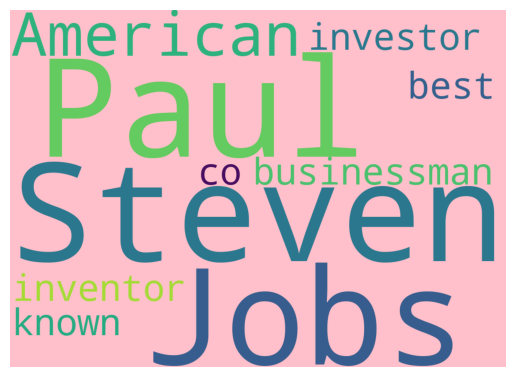

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

stopword=stopwords.words('english')
stopword.append('best')

text='''Steven Paul Jobs was an American businessman, inventor, and investor best known for co-founding the technology giant Apple Inc.'''
wc=WordCloud(width=1000,height=720,margin=2,max_words=10,background_color='pink').generate(text)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [78]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each